In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
%%time
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

CPU times: user 549 ms, sys: 593 ms, total: 1.14 s
Wall time: 2.32 s


2021-10-26 17:52:38.298804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-26 17:52:38.397249: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-26 17:52:38.397940: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-26 17:52:38.399155: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
%%time
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

2021-10-26 17:52:42.355297: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2021-10-26 17:52:43.736455: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1563/1563 [==============================] - 13s 4ms/step - loss: 1.5815 - accuracy: 0.4217 - val_loss: 1.2961 - val_accuracy: 0.5352
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2887 - accuracy: 0.5375 - val_loss: 1.1851 - val_accuracy: 0.5818
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1659 - accuracy: 0.5840 - val_loss: 1.1157 - val_accuracy: 0.6076
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0778 - accuracy: 0.6141 - val_loss: 0.9952 - val_accuracy: 0.6516
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0126 - accuracy: 0.6385 - val_loss: 0.9518 - val_accuracy: 0.6678
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9574 - accuracy: 0.6595 - val_loss: 0.9310 - val_accuracy: 0.6762
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9021 - accuracy: 0.6789 - val_loss: 0.8900 - val_accuracy: 0.6927
Ep

# Accuracy
**Training accuracy**: 0.7625  
**Validation Accuracy** = 70.43%


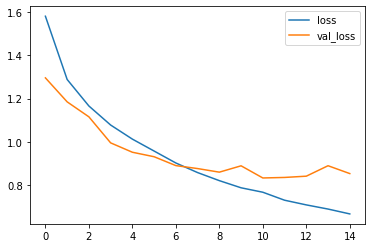

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

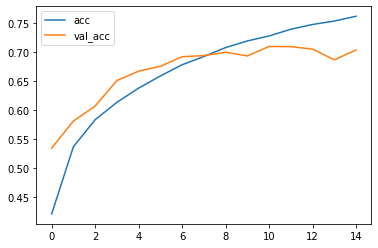

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Graph interpretation
### Since training acc is increasing whereas val_acc is almost constant means the **model is overfitting the noise**

Confusion matrix, without normalization
[[714  26  42  12  17   9   7   7 109  57]
 [  5 871   1   6   6   2   1   2  18  88]
 [ 70  13 537  86  83  96  31  38  29  17]
 [ 27  18  37 502  71 213  33  42  24  33]
 [ 35   6  65  73 617  48  22 106  21   7]
 [ 14  11  20 174  34 651  12  48  21  15]
 [ 10  15  39 123  47  34 689   7  18  18]
 [ 21   3  15  37  33  60   4 795   8  24]
 [ 46  53   7   3   5   5   2   3 843  33]
 [ 24  95   6  12   1   5   4  16  13 824]]


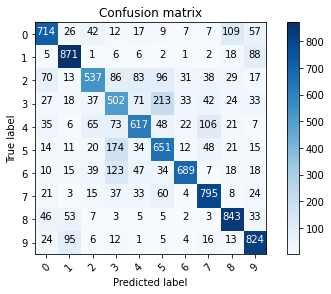

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [10]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

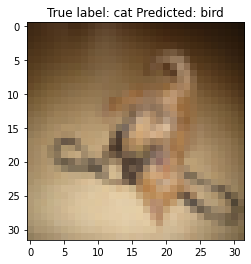

In [11]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

### As we can see this dataset is really tough as I can also not predict if this a bird or not :-(